In [2]:
import sys, os
import yaml
from hypnotoad import tokamak
from hypnotoad.core.mesh import BoutMesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

onedrive_path = onedrive_path = str(os.getcwd()).split("OneDrive")[0] + "OneDrive"
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\sdtools"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages\soledge"))
sys.path.append(os.path.join(onedrive_path, r"Project\python-packages"))

from xbout import open_boutdataset
from hermes3.grid_fields import *
import h5py

# %matplotlib qt
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

In [5]:
eq

(<hypnotoad.cases.tokamak.TokamakEquilibrium at 0x1f6393cfe60>,
 ValueError('(upper-lower)=-0.008701289814695546 and grad_upper=0.000614329224945339 have different signs: should both be increasing or both be decreasing.'))

  nx = 33, ny = 65
250

Options
Name                                              |  Value                      
N_norm_prefactor                                  |  1.0             (default)  
extrapolate_profiles                              |  False           (default)  
finecontour_Nfine                                 |  100             (default)  
finecontour_atol                                  |  1e-12           (default)  
finecontour_diagnose                              |  False           (default)  
finecontour_extend_prefactor                      |  2.0             (default)  
finecontour_maxits                                |  200             (default)  
finecontour_overdamping_factor                    |  0.8             (default)  
leg_extend                                        |  0.0             (default)  
leg_extend_lower_inner                            |  0.0             (default)  
leg_extend_lower_outer                            |  0.0             (default

C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\cases\tokamak.py:398: UserWarning: Reversing the sign of the poloidal field
  warnings.warn("Reversing the sign of the poloidal field")
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\cases\tokamak.py:413: UserWarning: Reversing the sign of the toroidal field
  warnings.warn("Reversing the sign of the toroidal field")
c:\Users\mikek\pyenvs\fusion-3.12.11\Lib\site-packages\scipy\integrate\_ivp\ivp.py:621: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  solver = method(fun, t0, y0, tf, vectorized=vectorized, **options)


creating region 0 - inner_lower_divertor(0)
creating region 1 - inner_lower_divertor(1)
creating region 2 - inner_core(0)
creating regionndicular: 0 3 - inner_core(1)
creating region 4 - inner_upper_divertor(0)
creating region 5 - inner_upper_divertor(1)
creating region 6 - outer_upper_divertor(0)
creating region 7 - outer_upper_divertor(1)
creating region 8 - outer_core(0)4
creating regionndicular: 0 9 - outer_core(1)
creating region 10 - outer_lower_divertor(0)
creating region 11 - outer_lower_divertor(1)
Get RZ values0endicular: 0 3 5 6


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:331: RuntimeWarning: invalid value encountered in divide
  - (thisR1_b[:, 1] - thisR1_b[:, 0]) / (thisZ1_b[:, 1] - thisZ1_b[:, 0])
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:269: RuntimeWarning: invalid value encountered in divide
  thisR1_b[:, 0] + thisdR1 / thisdZ1 * (Z2 - dZ2 / dR2 * R2 - thisZ1_b[:, 0])
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\equilibrium.py:270: RuntimeWarning: invalid value encountered in divide
  ) / (1.0 - thisdR1 / thisdZ1 * dZ2 / dR2)


Mesh file C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3e2-lores_widev2.nc closed


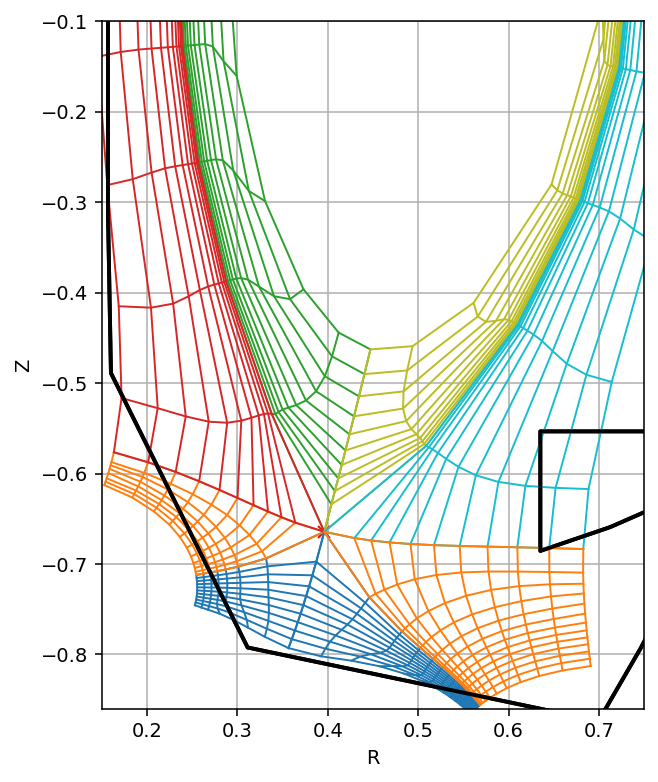

In [ ]:
gridname = "g3e6-lores_widev2_nonortho_xpoint_narrowcore"
path = os.path.join(onedrive_path, r"Project\collab\tech\grid\ST40\matteo-mod")
path_yaml = os.path.join(path, f"{gridname}.yml")
path_grid = os.path.join(path, f"{gridname}.nc")

with open(path_yaml) as f:
	options = yaml.safe_load(f)

with open(os.path.join(onedrive_path, r"Project\collab\tech\grid\ST40\4-soledge_optimised\ST40_P3_eq_0015_modgeom.geqdsk"), "rt") as fh:
    eq = tokamak.read_geqdsk(fh, settings=options, nonorthogonal_settings=options)
    
mesh = BoutMesh(eq, options)
# mesh.redistributePoints(options)
mesh.calculateRZ()
fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
# mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
mesh.plotGridCellEdges(ax = ax, lw = 1)
eq.plotWall(axis = ax)
ax.grid()
ax.legend('', frameon=False)
# ax.set_xlim([0.12, 0.85]); ax.set_ylim([-0.86,0.1])     # Both lower divertors
ax.set_xlim([0.15, 0.75]); ax.set_ylim([-0.86,-0.1])     # Both lower divertors
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)


## PLOT REFERENCE
mesh2 = Mesh(r"C:\Users\mikek\OneDrive\Project\collab\tech\grid\ST40\matteo-mod\g3e2-lores_widev2.nc")
kwargs = dict(s= 1, zorder = 20, c = "r", alpha = 0.1)
kwargs2 = dict(s= 1, zorder = 20, c = "k", alpha = 0.1)
# ax.scatter(mesh2.mesh["Rxy"].flatten(), mesh2.mesh["Zxy"].flatten(), label = "Reference", **kwargs)
# ax.scatter(mesh2.mesh["Rxy"].flatten(), mesh2.mesh["Zxy"].flatten(), **kwargs)
# ax.scatter(mesh2.mesh["Rxy"].flatten(), mesh2.mesh["Zxy"].flatten(), label = "Reference", **kwargs2)
# ax.scatter(mesh2.mesh["Rxy"].flatten(), mesh2.mesh["Zxy"].flatten(), **kwargs2)
mesh2.close()

plt.savefig(os.path.join(path, gridname + ".png"), dpi = 150)
mesh.geometry()
mesh.writeGridfile(path_grid)


In [12]:
mesh.geometry()
mesh.writeGridfile(path_grid)

Calculate geometry
Distances inner_lower_divertor(0)
Distances inner_lower_divertor(1)
Distances inner_core(0)
Distances inner_core(1)
Distances inner_upper_divertor(0)
Distances inner_upper_divertor(1)
Distances outer_upper_divertor(0)
Distances outer_upper_divertor(1)
Distances outer_core(0)
Distances outer_core(1)
Distances outer_lower_divertor(0)
Distances outer_lower_divertor(1)
1 inner_lower_divertor(0)
1 inner_lower_divertor(1)
1 inner_core(0)
1 inner_core(1)
1 inner_upper_divertor(0)
1 inner_upper_divertor(1)
1 outer_upper_divertor(0)
1 outer_upper_divertor(1)
1 outer_core(0)
1 outer_core(1)
1 outer_lower_divertor(0)
1 outer_lower_divertor(1)
Calculate zShiftrtor(1) calcHy 20 / 21


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1382: UserWarning: need to check that this is correct for non-orthogonal grids
  warnings.warn("need to check that this is correct for non-orthogonal grids")


Calculate Metricrtor(1))ivertor(1)


C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1944: RuntimeWarning: divide by zero encountered in divide
  result.xlow[1:-1, :] = (f.centre[1:, :] - f.centre[:-1, :]) / self.dx.xlow[
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1951: RuntimeWarning: divide by zero encountered in divide
  result.xlow[0, :] = (f.centre[0, :] - f.xlow[0, :]) / (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1956: RuntimeWarning: divide by zero encountered in divide
  result.xlow[-1, :] = (f_outer - f.centre[-1, :]) / self.dx.xlow[-1, :]
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1967: RuntimeWarning: divide by zero encountered in divide
  result.corners[1:-1, :] = (
C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\core\mesh.py:1974: RuntimeWarning: divide by zero encountered in divide
  result.corners[0, :] = (f.ylow[0, :] - f.corners[0, :]) / (

C:\Users\mikek\OneDrive\Project\python-packages\Hypnotoad\hypnotoad\utils\utils.py:267: UserWarning: The '__version__' attribute is deprecated and will be removed in MarkupSafe 3.1. Use feature detection, or `importlib.metadata.version("markupsafe")`, instead.
  module_string += f"{module}: {sys.modules[module].__version__},\n"


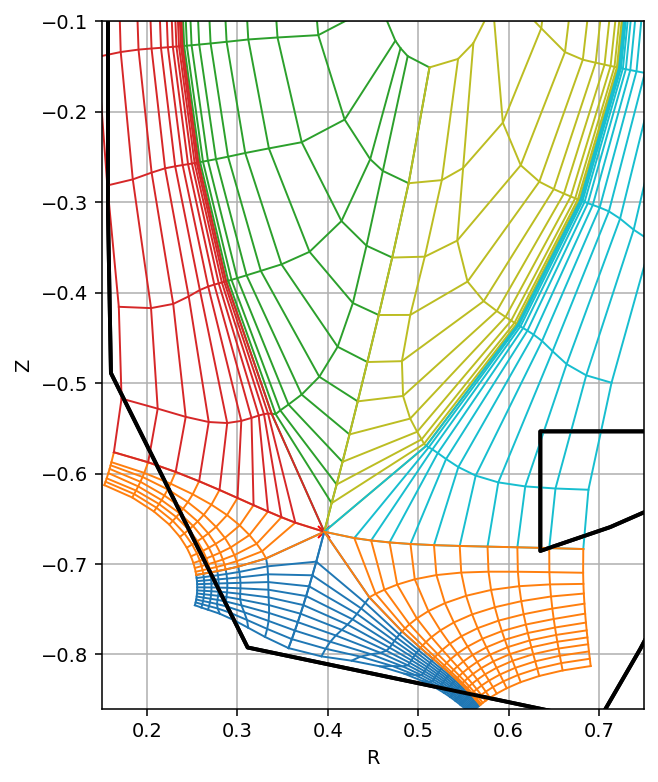

In [44]:
fig, ax = plt.subplots(figsize = (5,7), dpi = 140)
# eq.plotPotential(ncontours=200, axis = ax, linewidths = 0.5)
eq.plotWall(axis = ax)
ax.plot(*eq.x_points[0], "rx",)
# mesh.plotPoints(xlow=False, ylow=False, corners=False, ax = ax, s = 2)
mesh.plotGridCellEdges(ax = ax, lw = 1)
eq.plotWall(axis = ax)
ax.grid()
ax.legend('', frameon=False)
ax.set_xlim([0.15, 0.75]); ax.set_ylim([-0.86,-0.1])     # Both lower divertors
# ax.set_xlim([0.25, 0.6]); ax.set_ylim([-0.9,-0.7])     # Both lower divertors zoom
# ax.set_xlim([0.20, 0.45]); ax.set_ylim([0.6,0.8])     # Inner upper leg
# ax.set_xlim([0.62, 0.800]); ax.set_ylim([-0.08,0])     # OMP
# ax.set_xlim([0.12, 0.300]); ax.set_ylim([-0.15,0.05])     # IMP
ax.set_xlabel("R")
ax.set_ylabel("Z")
ax.set_aspect(1)

In [57]:
mesh.

AttributeError: 'BoutMesh' object has no attribute 'keys'